## Dependencies and Setup

In [1]:
### Import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime

### Import API Key
from api_keys import weather_api_key

### Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

### Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
### Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lat_list = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lng_list = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)

### Use citipy to find the closet city with lat and lng. 
city_list = []
country_list = []
check_city_list = []

for item in np.arange(1500):
    city = citipy.nearest_city(lat_list[item], lng_list[item]).city_name
    country = citipy.nearest_city(lat_list[item], lng_list[item]).country_code
    check_city = f"{city}, {country}"
    if check_city not in check_city_list:
        check_city_list.append(check_city)
        city_list.append(city)
        country_list.append(country)

## Perform API Calls
- Perform a weather check on each city using a serires of successive API calls.
- Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
city_names = []
country_names = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lats = []
lngs = []

base_url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Beginning Data Retrieval")
print("------------------------------")

for item in np.arange(len(city_list)):
    target_url = base_url + city_list[item] + "," + country_list[item] + "&units=imperial" +"&APPID=" + weather_api_key
    get_url = requests.get(target_url).json()

    try: 
        print(f"Processing Record {item} | {city_list[item]}")
        city_names.append(get_url["name"])
        country_names.append(get_url["sys"]["country"])
        date.append(get_url["dt"])
        max_temp.append(get_url["main"]["temp_max"])
        humidity.append(get_url["main"]["humidity"])
        cloudiness.append(get_url["clouds"]["all"])
        wind_speed.append(get_url["wind"]["speed"])
        lats.append(get_url["coord"]["lat"])
        lngs.append(get_url["coord"]["lon"])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 0 | barrow
Processing Record 1 | cape town
Processing Record 2 | kapaa
Processing Record 3 | egvekinot
Processing Record 4 | ushuaia
Processing Record 5 | pacific grove
Processing Record 6 | aktau
Processing Record 7 | birin
Missing field/result... skipping.
Processing Record 8 | kathmandu
Processing Record 9 | aiani
Processing Record 10 | albany
Processing Record 11 | avarua
Processing Record 12 | taolanaro
Missing field/result... skipping.
Processing Record 13 | port elizabeth
Processing Record 14 | mataura
Missing field/result... skipping.
Processing Record 15 | hermanus
Processing Record 16 | dicabisagan
Processing Record 17 | dikson
Processing Record 18 | wloszczowa
Processing Record 19 | puerto ayora
Processing Record 20 | codrington
Missing field/result... skipping.
Processing Record 21 | rikitea
Processing Record 22 | punta arenas
Processing Record 23 | ambilobe
Processing Record 24 | longyearbyen
Process

Processing Record 219 | dubbo
Processing Record 220 | huarmey
Processing Record 221 | tuy hoa
Processing Record 222 | eyl
Processing Record 223 | lebu
Processing Record 224 | kula
Processing Record 225 | laguna
Missing field/result... skipping.
Processing Record 226 | puerto montt
Processing Record 227 | iquique
Processing Record 228 | msowero
Processing Record 229 | chuy
Processing Record 230 | samusu
Missing field/result... skipping.
Processing Record 231 | ligayan
Processing Record 232 | waipawa
Processing Record 233 | fairbanks
Processing Record 234 | richards bay
Processing Record 235 | khatanga
Processing Record 236 | pemangkat
Missing field/result... skipping.
Processing Record 237 | sandviken
Processing Record 238 | bandar
Processing Record 239 | coihaique
Processing Record 240 | nome
Processing Record 241 | torbay
Processing Record 242 | marrakesh
Processing Record 243 | guerrero negro
Processing Record 244 | cardoso
Processing Record 245 | fayaoue
Processing Record 246 | lare

Processing Record 437 | voh
Processing Record 438 | maturin
Processing Record 439 | beringovskiy
Processing Record 440 | luklukan
Processing Record 441 | siutu
Missing field/result... skipping.
Processing Record 442 | puerto del rosario
Processing Record 443 | pithora
Processing Record 444 | ucluelet
Processing Record 445 | kota kinabalu
Processing Record 446 | bonthe
Processing Record 447 | umm kaddadah
Processing Record 448 | alofi
Processing Record 449 | vryheid
Processing Record 450 | san antonio
Processing Record 451 | lokosovo
Processing Record 452 | auki
Processing Record 453 | sangar
Processing Record 454 | guayaramerin
Processing Record 455 | san quintin
Missing field/result... skipping.
Processing Record 456 | senhor do bonfim
Processing Record 457 | yanam
Processing Record 458 | saldanha
Processing Record 459 | cerrito
Processing Record 460 | bolungarvik
Missing field/result... skipping.
Processing Record 461 | gunjur
Processing Record 462 | yenagoa
Processing Record 463 | p

Processing Record 659 | kosonsoy
Processing Record 660 | bezhetsk
Processing Record 661 | ferme-neuve
Processing Record 662 | yakeshi
Processing Record 663 | starokucherganovka
Processing Record 664 | taoudenni
------------------------------
Data Retrieval Complete
------------------------------


## Convert Raw Data to DataFrame
- Export the collected data into a CSV.
- Display the DataFrame

In [4]:
collected_data = pd.DataFrame([city_names, country_names, date, max_temp, 
                 humidity, cloudiness, wind_speed, lats, lngs],
                 index = ["City", "Country", "Date", "Max Temperature",
                         "Humidity", "Cloudiness", "Wind Speed", 
                         "Latitude", "Longitude"]).T

### Save Data to csv
collected_data.to_csv("Collected_Weather_Info.csv")

In [5]:
collected_data.head()

,City,Country,Date,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Barrow,US,1548976500,21.02,65,90,10.29,39.51,-90.4
1,Cape Town,ZA,1548975600,71.6,60,0,10.29,-33.93,18.42
2,Kapaa,US,1548975360,78.08,63,90,26.4,22.08,-159.32
3,Egvekinot,RU,1548977691,-14.31,62,0,2.82,66.32,-179.17
4,Ushuaia,AR,1548975600,48.2,76,90,9.17,-54.81,-68.31


## Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as png files. 

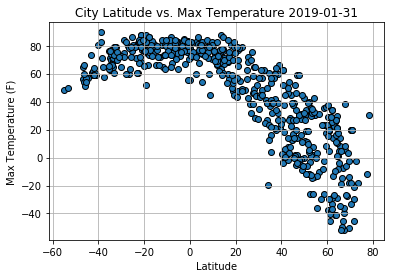

In [6]:
### Convert Date to readable format.
check_date = datetime.utcfromtimestamp(collected_data["Date"][0]).date()

### Latitude VS. Temperature Plot
plt.scatter(collected_data["Latitude"], collected_data["Max Temperature"], 
            marker="o", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature {check_date}')
plt.savefig("./latitude_vs_temperature.png")

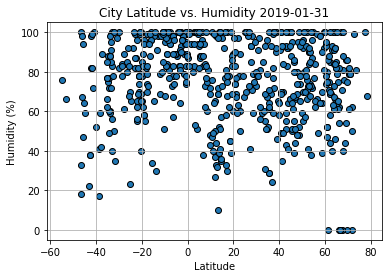

In [7]:
### Latitude VS. Humidity Plot
plt.scatter(collected_data["Latitude"], collected_data["Humidity"], 
            marker="o", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {check_date}")
plt.savefig("./latitude_vs_humidity.png")

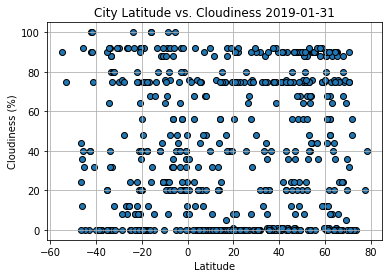

In [8]:
### Latitude VS. Cloudiness Plot
plt.scatter(collected_data["Latitude"], collected_data["Cloudiness"], 
            marker="o", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {check_date}")
plt.savefig("./latitude_vs_cloudiness.png")

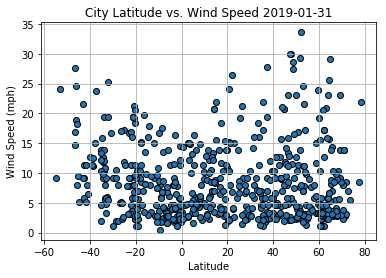

In [9]:
### Latitude VS. Wind Speed Plot
plt.scatter(collected_data["Latitude"], collected_data["Wind Speed"], 
            marker="o", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {check_date}")
plt.savefig("./latitude_vs_wind_speed.png")

## Observable trends based on the data.
- Currently, the locations that have latitudes smaller than 20 degree, have a range of temperature around 40 to 80 Fahrenheit. 
- The latitude that is larger than 20 degree, shows a strong negative correlation with tamperature. In other words, for those locations that have larger than 20 degree in latitudes, the temperature will decrease as the degree of latitude increase. 
- The percentage of humidity, cloudiness and wind speed do not show significant correlations with latitude. 
